In [1]:
#Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
#pick the dataset from kaggle here is the link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
#Data PreProcessing
#training
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [54]:
#Data PreProcessing
#Validation
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [66]:
#Model Buidling
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

#building Convolutional layer
#Layer 1
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu',))          
model.add(MaxPool2D(pool_size=2, strides=2))
#layer2
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))          
model.add(MaxPool2D(pool_size=2, strides=2))
#layer3
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))          
model.add(MaxPool2D(pool_size=2, strides=2))
#layer4
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))          
model.add(MaxPool2D(pool_size=2, strides=2))
#layer5
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))          
model.add(MaxPool2D(pool_size=2, strides=2))
#Dropout
model.add(Dropout(0.25)) #to avoid overfitting
#Flatten
model.add(Flatten())
#Hidden Layer
model.add(Dense(units=1500, activation='relu'))
#Output layer
model.add(Dense(units=38, activation='softmax'))

In [67]:
# Model Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Corrected argument name
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Valid metric for classification
)

# Display model summary
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)                  │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_112 (Conv2D)                  │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_113 (Conv2D)                  │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_114 (Conv2D)                  │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_115 (Conv2D)                  │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#training model
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3892s 2s/step - accuracy: 0.9562 - loss: 0.1291 - val_accuracy: 0.9418 - val_loss: 0.1895
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3699s 2s/step - accuracy: 0.9661 - loss: 0.1016 - val_accuracy: 0.9526 - val_loss: 0.1527
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3420s 2s/step - accuracy: 0.9726 - loss: 0.0843 - val_accuracy: 0.9531 - val_loss: 0.1590
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3609s 2s/step - accuracy: 0.9772 - loss: 0.0685 - val_accuracy: 0.9646 - val_loss: 0.1137
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3900s 2s/step - accuracy: 0.9793 - loss: 0.0621 - val_accuracy: 0.9603 - val_loss: 0.1298
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3887s 2s/step - accuracy: 0.9810 - loss: 0.0549 - val_accuracy: 0.9660 - val_loss: 0.1088
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3421s 2s/step - accuracy: 0.9845 - loss: 0.0470 - val_accuracy: 0.9701 - val_loss: 0.1014
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3420s 2s/step - accuracy: 0.9863 -

In [74]:
#Model Evaluation on training
training_loss, training_accuracy = model.evaluate(training_set)
print("Accuracy:", training_accuracy)
print("Loss:", training_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 889s 405ms/step - accuracy: 0.9768 - loss: 0.0712
Accuracy: 0.9788320660591125
Loss: 0.06515011191368103


In [87]:
#Model Evaluation on Validation
val_loss, val_accuracy = model.evaluate(validation_set)
print("Accuracy:", val_accuracy)
print("Loss:", val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 224s 407ms/step - accuracy: 0.9459 - loss: 0.2031
Accuracy: 0.9465057849884033
Loss: 0.19876901805400848


In [88]:
#Save model
model.save("trained_model.keras")

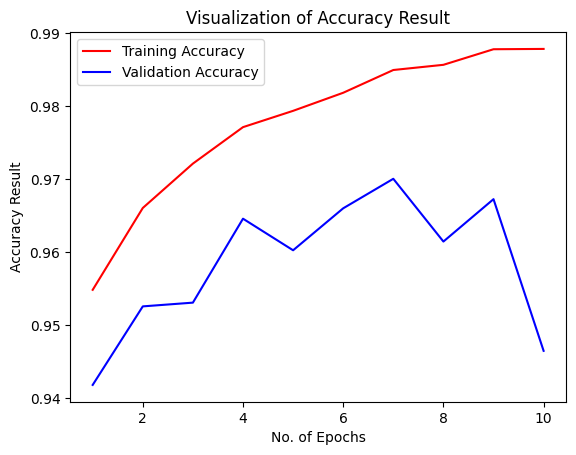

In [90]:
#Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [77]:
#Some other metrics for evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [93]:
y_perdict = model.predict(test_set)
y_perdict, y_perdict.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 283s 514ms/step


(array([[9.9999976e-01, 1.2417702e-10, 3.9594394e-11, ..., 5.3245537e-15,
         6.5699310e-15, 1.1821479e-12],
        [9.9979275e-01, 2.3313442e-09, 5.7183397e-10, ..., 9.3691591e-12,
         2.4374339e-12, 2.1508502e-09],
        [9.9999940e-01, 6.0868480e-12, 5.7155055e-11, ..., 3.5060994e-16,
         2.0296334e-14, 1.6259195e-12],
        ...,
        [1.3752667e-09, 5.4309010e-12, 1.7123183e-08, ..., 2.3258953e-09,
         1.3197989e-09, 9.9999905e-01],
        [4.0323006e-10, 8.4705321e-14, 3.9761683e-09, ..., 6.4484209e-09,
         1.0858940e-10, 9.9999976e-01],
        [5.4214946e-17, 4.7806865e-20, 1.2634380e-16, ..., 4.0173523e-19,
         1.1740979e-14, 1.0000000e+00]], shape=(17572, 38), dtype=float32),
 (17572, 38))

In [94]:
perdicted_categories = tf.argmax(y_perdict,axis=1)
perdicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [95]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(17572, 38), dtype=float32)>

In [96]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_true,perdicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.90      0.98      0.94       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.89      0.

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, perdicted_categories)
print("Confusion Matrix:\n", cm.shape)

Confusion Matrix:
 (38, 38)


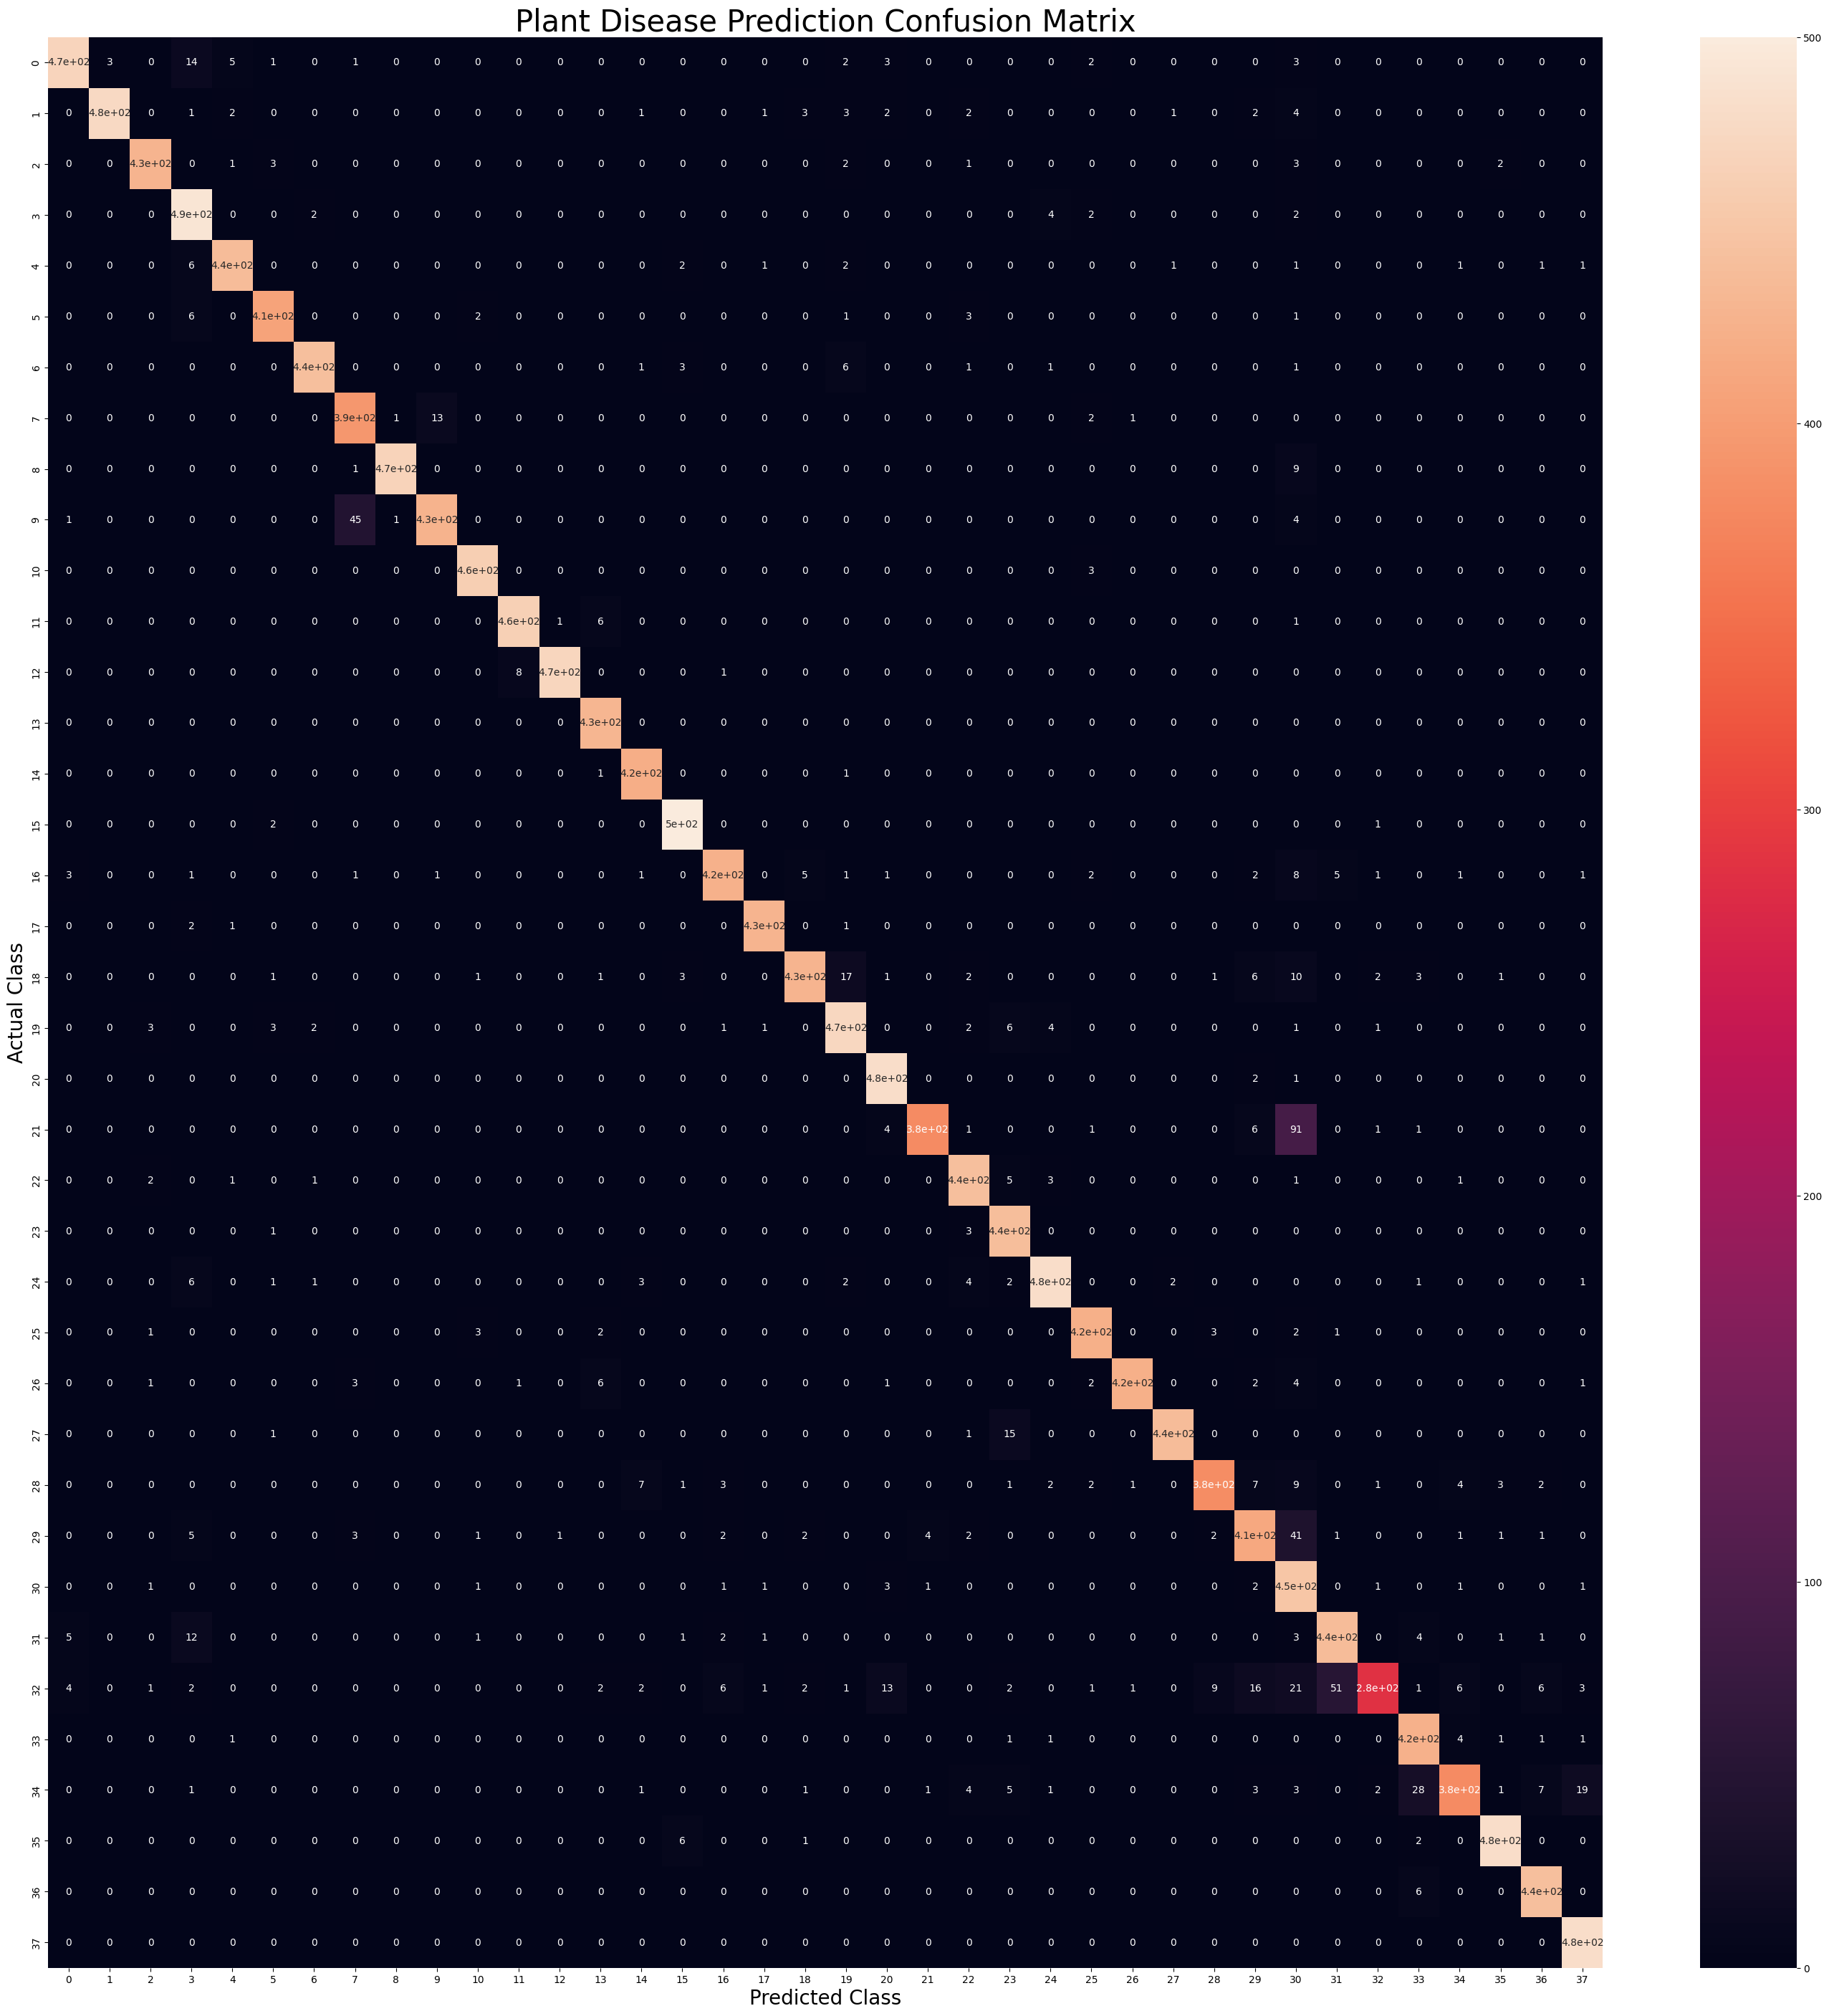

In [109]:
plt.figure(figsize=(35,35))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()